In [ ]:
!git clone https://github.com/TorchSpatiotemporal/tsl.git
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-1.10.1+cu113.html
!pip install ./tsl

fatal: destination path 'tsl' already exists and is not an empty directory.
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://data.pyg.org/whl/torch-1.10.1+cu113.html
Processing ./tsl
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for torch-spatiotemporal: filename=torch_spatiotemporal-0.1.0-py3-none-any.whl size=157010 sha256=4292a4865fc1bae0758c0e6f6ee76f8015875dd5a6d84326460a214e9c85a8ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-pr2jl5vf/wheels/b4/a3/9b/9ade23f88ef4ab1d0e40c003fcaa8053b6b3ed9d1e82630a5c
Successfully built torch-spatiotemporal
  Attempting uninstall: torch-

In [1]:
import tsl
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
tsl.logger.disabled = True

print(f"tsl version  : {tsl.__version__}")
print(f"torch version: {torch.__version__}")

tsl version  : 0.1.0
torch version: 1.10.1+cu111


In [2]:
from tsl.datasets import MetrLA
dataset = MetrLA()
print(dataset)

MetrLA(length=34272, n_nodes=207, n_channels=1)


In [3]:
df = dataset.dataframe()
df.head()

nodes,773869,767541,767542,717447,717446,717445,773062,767620,737529,717816,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
channels,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,62.750000,...,45.625000,65.500,64.500000,66.428574,66.875,59.375000,69.000000,59.250000,69.000000,61.875
2012-03-01 00:05:00,62.666668,68.555557,65.444443,62.444443,64.444443,68.111115,65.000,65.000,57.444443,63.333332,...,50.666668,69.875,66.666664,58.555557,62.000,61.111111,64.444443,55.888889,68.444443,62.875
2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000
2012-03-01 00:15:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000
2012-03-01 00:20:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,65.375000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857140,62.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


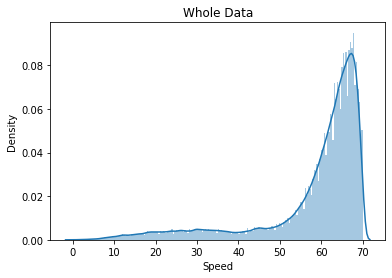

In [4]:
ax = sns.distplot(df, kde=True, bins=200, hist=True)
plt.xlabel("Speed")
plt.ylabel("Density")
plt.title("Whole Data")
plt.show(ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

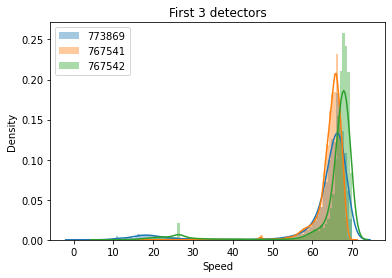

In [5]:
p1, p2, p3 = df['773869'], df['767541'], df['767542']
ax1 = sns.distplot(p1, kde=True, bins=100, hist=True, label='773869')
ax2 = sns.distplot(p2, kde=True, bins=100, hist=True, label='767541')
ax3 = sns.distplot(p3, kde=True, bins=100, hist=True, label='767542')
plt.xlabel("Speed")
plt.ylabel("Density")
plt.title("First 3 detectors")
plt.legend()
plt.show(ax1)
plt.show(ax2)
plt.show(ax3)